In [13]:
from utils.plot_chess import plot_game, plot_fen
import matplotlib.pyplot as plt

you need to build the cmake and then the makefile in order to import the chess library!

In [15]:
import sys
sys.path.insert(0, "../build")
import chess  

## `Game` and `Move` classes

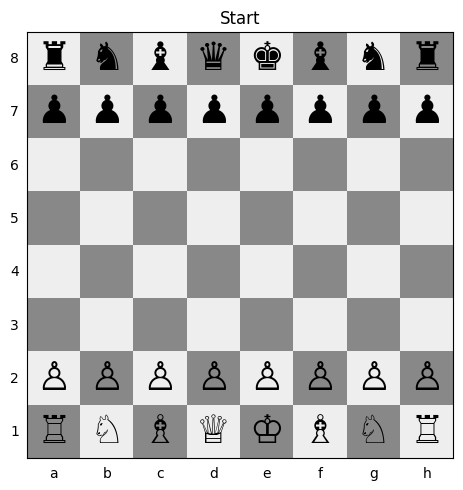

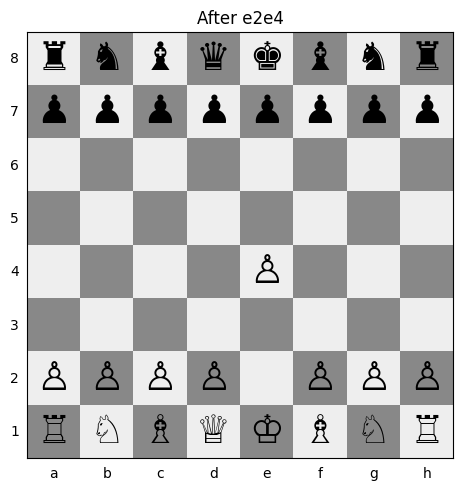

In [16]:
g = chess.Game()
g.reset_from_fen("rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1")
plot_game(g, title="Start")
plt.show()

# Make a move and re-plot
m = g.parse_move("e2","e4")  # or chess.Move.from_strings(g, "e2","e4") if you added that helper
g.do_move(m)
plot_game(g, title="After e2e4")
plt.show()


two ways to parse a move

In [17]:
g = chess.Game()
m1 = chess.Move.from_strings(g, "g1", "f3")

g.do_move(m1)
print(g.to_fen())

m2 = chess.Move.from_uci(g, "b8c6")
g.do_move(m2)
print(g.to_fen())

rnbqkbnr/pppppppp/8/8/8/5N2/PPPPPPPP/RNBQKB1R b KQkq - 0 1
r1bqkbnr/pppppppp/2n5/8/8/5N2/PPPPPPPP/RNBQKB1R w KQkq - 0 1


## `Env` class

The `Env` class represents the RL's environment. It contains the state, emits the reward, is able to evolve.

In [ ]:
# Create a new game
game = chess.Game()

# Create Env (gamma=1.0, step_penalty=0.0 for default behavior)
env = chess.Env(game, gamma=0.99, step_penalty=0.01)

# Display initial state
print(env)  # uses __str__ from Env

Current FEN: rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1
Current Board:
8 r n b q k b n r 
7 p p p p p p p p 
6                 
5                 
4                 
3                 
2 P P P P P P P P 
1 R N B Q K B N R 
  a b c d e f g h


Side to move: White
Is Game Over: No
Current Ply: 0



`env.state()` returns the state info (see `/include/environment.hpp`)

In [ ]:
env.state()

<Game fen="rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1">

to make the env evolve (in the RL sense) we use the `.step(Move)` function. The move argument is the action that the agent makes and the environment evolves according to the chess rules (if the passed move is valid). The `.step` functions returns the pair: reward, a bool that indicates if it is the terminal state or not (i.e. checkmate)

In [31]:
env = chess.Env(game, gamma=0.99, step_penalty=0.01)
mv = chess.Move.from_strings(env.state(), "e2", "e4")  # env.state() returns Game
step = env.step(mv)
print(env)


Current FEN: rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR b KQkq e3 0 1
Current Board:
8 r n b q k b n r 
7 p p p p p p p p 
6                 
5                 
4         P       
3                 
2 P P P P   P P P 
1 R N B Q K B N R 
  a b c d e f g h


Side to move: Black
Is Game Over: No
Current Ply: 1



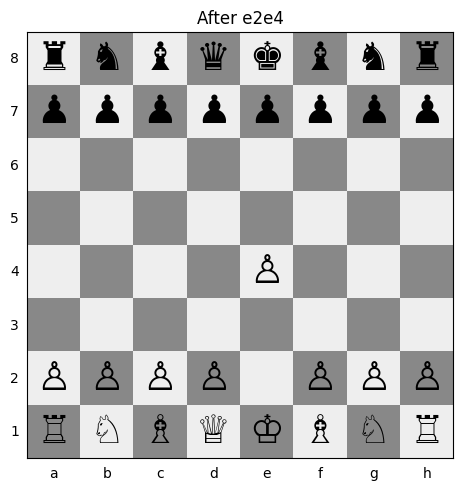

In [33]:
plot_game(env.state(), title="After e2e4")
plt.show()

In [34]:

print(step.reward, step.done)

-0.01 False
